## Plot Benchmark Results for Calculations using MMTF Hadoop Sequence Files
The plots analyze the timing for reading the entire [Protein Data Bank (PDB)](https://www.wwpdb.org/) as an [MMTF Hadoop Sequence File](https://mmtf.rcsb.org/download.html) and performing two calculations using theses data. 
1. **read** read MMTF Hadoop Sequence File
2. **interactions** tabulate zinc interaction in a dataframe for PDB structures with a single model
3. **saltbridges** tabulate salt-bridge interactions in a dataframe for PDB structures with a single models

Since Apache Spark use a directed acyclic graph (DAG) scheduler to execute steps, we cannot directly monitor the times required for each step. We infer the effective time for each step by subtracting the time from a previous step run independently.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r = pd.read_csv('../results/read.csv')[['cores','read']]
i = pd.read_csv('../results/interactions.csv')[['cores','interactions']]
b = pd.read_csv('../results/saltbridges.csv')[['cores','saltbridges']]

In [3]:
data = b.merge(i, on='cores')
data = data.merge(r, on='cores')
data = data.sort_values('cores')

In [4]:
data = data.rename(index=str, columns={'interactions': 'read_interactions'})
data = data.rename(index=str, columns={'saltbridges': 'read_saltbridges'})

In [5]:
n_cores = data.cores.max()
print("Max number of cores:", n_cores)

Max number of cores: 4


In [6]:
df = data.copy()
df

,cores,read_saltbridges,read_interactions,read
2,1,2019.266900,1153.265680,433.299615
1,2,1114.926124,660.800219,280.955425
0,4,1061.849043,621.530444,252.546578


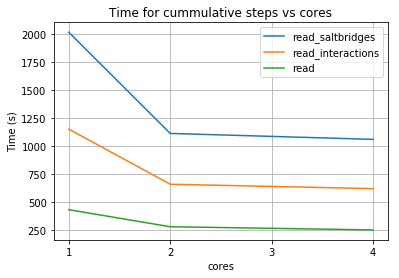

In [7]:
df.plot.line(x="cores", grid=True, title="Time for cummulative steps vs cores")

plt.ylabel('Time (s)')
plt.xticks(np.arange(1, n_cores+1, 1))
plt.savefig('../results/CalcCummulativeSteps_TimeVsCores.png')
plt.show()

## Calculate Speedup

In [8]:
df['read'] = df.read.max()/df.read
df['read_interactions'] = df.read_interactions.max()/df.read_interactions
df['read_saltbridges'] = df.read_saltbridges.max()/df.read_saltbridges
df

,cores,read_saltbridges,read_interactions,read
2,1,1.000000,1.000000,1.000000
1,2,1.811122,1.745256,1.542236
0,4,1.901652,1.855526,1.715722


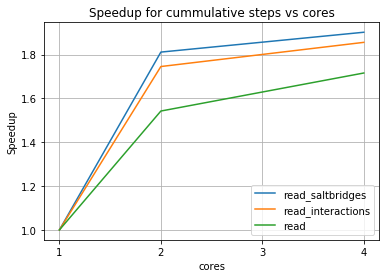

In [9]:
df.plot.line(x="cores", grid=True, title="Speedup for cummulative steps vs cores")

plt.ylabel('Speedup')
plt.xticks(np.arange(1, n_cores+1, 1))
plt.savefig('../results/CalcCummulativeSteps_SpeedupVsCores.png')
plt.show()

## Calculate Time for individual steps
Here we subtract the time required to read the data to see how the calculations scale with the number of cores.

In [10]:
df = data.copy()
df['saltbridges'] = df.read_saltbridges - df.read
df['interactions'] = df.read_interactions - df.read
df

,cores,read_saltbridges,read_interactions,read,saltbridges,interactions
2,1,2019.266900,1153.265680,433.299615,1585.967285,719.966065
1,2,1114.926124,660.800219,280.955425,833.970699,379.844794
0,4,1061.849043,621.530444,252.546578,809.302465,368.983866


In [11]:
df = df[['cores','read','saltbridges','interactions']].copy()

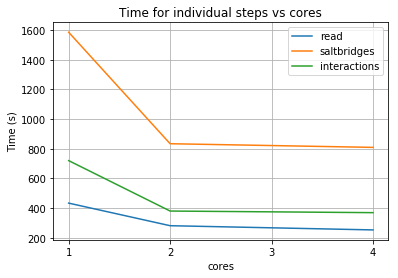

In [12]:
df.plot.line(x="cores", grid=True, title="Time for individual steps vs cores")

plt.ylabel('Time (s)')
plt.xticks(np.arange(1, n_cores+1, 1))
plt.savefig('../results/CalcIndividualSteps_TimeVsCores.png')
plt.show()

In [13]:
df['read'] = df.read.max()/df.read
df['interactions'] = df.interactions.max()/df.interactions
df['saltbridges'] = df.saltbridges.max()/df.saltbridges

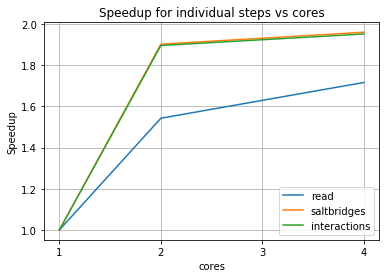

In [14]:
df.plot.line(x="cores", grid=True, title="Speedup for individual steps vs cores")

plt.ylabel('Speedup')
plt.xticks(np.arange(1, n_cores+1, 1))
plt.savefig('../results/CalcIndividualSteps_SpeedupVsCores.png')
plt.show()